In [1]:
import pandas as pd
import numpy as np

In [2]:
cc_data = pd.read_csv('CC_general.csv')
cc_data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
cc_data.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [4]:
cc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

### Dropping 'CUST_ID' as we dont need it for segmentation purposes : 

In [5]:
cc_data.drop('CUST_ID', axis = 1, inplace = True)

In [6]:
cc_data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### Segregating continuous and categorical variables : 

In [7]:
num_vars = cc_data.select_dtypes(['float64','int64'])

In [8]:
cat_vars = cc_data.select_dtypes(['object'])

### Defining continuous and categorical summary functions, and missing imputation functions

In [9]:
def num_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  
                      x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),
                          x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [10]:
def cat_var_summary(x):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100/x.count(), 2)], 
                  index = ['N', 'NMISS', 'MODE', 'FREQ', 'PERCENT'])

In [11]:
def missing_imputation(x):
    if (x.dtypes == 'float64') | (x.dtypes == 'int64'):
        x = x.fillna(x.mean()) 
    else:
        x = x.fillna(x.mode())
    return x

In [12]:
num_vars.apply(num_var_summary).T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
BALANCE,8950.0,0.0,1.400205e+07,1564.474828,873.385231,2081.531879,4.332775e+06,0.000000,0.065101,8.814518,23.575529,128.281915,873.385231,2054.140036,4338.563657,5909.111808,9338.804814,19043.13856
BALANCE_FREQUENCY,8950.0,0.0,7.851573e+03,0.877271,1.000000,0.236904,5.612351e-02,0.000000,0.090909,0.272727,0.454545,0.888889,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
PURCHASES,8950.0,0.0,8.978683e+06,1003.204834,361.280000,2136.634782,4.565208e+06,0.000000,0.000000,0.000000,0.000000,39.635000,361.280000,1110.130000,2542.624000,3998.619500,8977.290000,49039.57000
ONEOFF_PURCHASES,8950.0,0.0,5.302314e+06,592.437371,38.000000,1659.887917,2.755228e+06,0.000000,0.000000,0.000000,0.000000,0.000000,38.000000,577.405000,1600.099000,2671.094000,6689.898200,40761.25000
INSTALLMENTS_PURCHASES,8950.0,0.0,3.679055e+06,411.067645,89.000000,904.338115,8.178274e+05,0.000000,0.000000,0.000000,0.000000,0.000000,89.000000,468.637500,1140.070000,1750.087500,3886.240500,22500.00000
CASH_ADVANCE,8950.0,0.0,8.760896e+06,978.871112,0.000000,2097.163877,4.398096e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1113.821139,3065.534560,4647.169122,9588.163357,47137.21176
PURCHASES_FREQUENCY,8950.0,0.0,4.388637e+03,0.490351,0.500000,0.401371,1.610985e-01,0.000000,0.000000,0.000000,0.000000,0.083333,0.500000,0.916667,1.000000,1.000000,1.000000,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.0,1.811996e+03,0.202458,0.083333,0.298336,8.900441e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.300000,0.750000,1.000000,1.000000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.0,3.261714e+03,0.364437,0.166667,0.397448,1.579647e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.750000,1.000000,1.000000,1.000000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.0,1.209541e+03,0.135144,0.000000,0.200121,4.004857e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.222222,0.416667,0.583333,0.833333,1.50000


### Outlier treatment : 

In [13]:
num_vars = num_vars.apply(lambda x : x.clip(lower = x.quantile(0.01), upper = x.quantile(0.99)))

In [14]:
num_vars.apply(num_var_summary).T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
BALANCE,8950.0,0.0,1.379237e+07,1541.046707,873.385231,1966.597484,3.867506e+06,0.065101,0.065248,8.814518,23.575529,128.281915,873.385231,2054.140036,4338.563657,5909.111808,9337.094398,9338.804814
BALANCE_FREQUENCY,8950.0,0.0,7.858846e+03,0.878083,1.000000,0.234032,5.477084e-02,0.090909,0.090909,0.272727,0.454545,0.888889,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
PURCHASES,8950.0,0.0,8.379252e+06,936.229237,361.280000,1525.185179,2.326190e+06,0.000000,0.000000,0.000000,0.000000,39.635000,361.280000,1110.130000,2542.624000,3998.619500,8961.796200,8977.290000
ONEOFF_PURCHASES,8950.0,0.0,4.801619e+06,536.493774,38.000000,1096.913512,1.203219e+06,0.000000,0.000000,0.000000,0.000000,0.000000,38.000000,577.405000,1600.099000,2671.094000,6684.195482,6689.898200
INSTALLMENTS_PURCHASES,8950.0,0.0,3.441260e+06,384.498368,89.000000,676.271068,4.573426e+05,0.000000,0.000000,0.000000,0.000000,0.000000,89.000000,468.637500,1140.070000,1750.087500,3885.853155,3886.240500
CASH_ADVANCE,8950.0,0.0,8.376493e+06,935.920972,0.000000,1775.774147,3.153374e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1113.821139,3065.534560,4647.169122,9584.005151,9588.163357
PURCHASES_FREQUENCY,8950.0,0.0,4.388637e+03,0.490351,0.500000,0.401371,1.610985e-01,0.000000,0.000000,0.000000,0.000000,0.083333,0.500000,0.916667,1.000000,1.000000,1.000000,1.000000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.0,1.811996e+03,0.202458,0.083333,0.298336,8.900441e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.300000,0.750000,1.000000,1.000000,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.0,3.261714e+03,0.364437,0.166667,0.397448,1.579647e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.750000,1.000000,1.000000,1.000000,1.000000
CASH_ADVANCE_FREQUENCY,8950.0,0.0,1.199449e+03,0.134017,0.000000,0.195550,3.823977e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.222222,0.416667,0.583333,0.833333,0.833333


### Missing value treatment : 

In [15]:
num_vars = num_vars.apply(missing_imputation)

In [16]:
num_vars.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [17]:
num_vars.apply(num_var_summary).T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
BALANCE,8950.0,0.0,1.379237e+07,1541.046707,873.385231,1966.597484,3.867506e+06,0.065101,0.065248,8.814518,23.575529,128.281915,873.385231,2054.140036,4338.563657,5909.111808,9337.094398,9338.804814
BALANCE_FREQUENCY,8950.0,0.0,7.858846e+03,0.878083,1.000000,0.234032,5.477084e-02,0.090909,0.090909,0.272727,0.454545,0.888889,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
PURCHASES,8950.0,0.0,8.379252e+06,936.229237,361.280000,1525.185179,2.326190e+06,0.000000,0.000000,0.000000,0.000000,39.635000,361.280000,1110.130000,2542.624000,3998.619500,8961.796200,8977.290000
ONEOFF_PURCHASES,8950.0,0.0,4.801619e+06,536.493774,38.000000,1096.913512,1.203219e+06,0.000000,0.000000,0.000000,0.000000,0.000000,38.000000,577.405000,1600.099000,2671.094000,6684.195482,6689.898200
INSTALLMENTS_PURCHASES,8950.0,0.0,3.441260e+06,384.498368,89.000000,676.271068,4.573426e+05,0.000000,0.000000,0.000000,0.000000,0.000000,89.000000,468.637500,1140.070000,1750.087500,3885.853155,3886.240500
CASH_ADVANCE,8950.0,0.0,8.376493e+06,935.920972,0.000000,1775.774147,3.153374e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1113.821139,3065.534560,4647.169122,9584.005151,9588.163357
PURCHASES_FREQUENCY,8950.0,0.0,4.388637e+03,0.490351,0.500000,0.401371,1.610985e-01,0.000000,0.000000,0.000000,0.000000,0.083333,0.500000,0.916667,1.000000,1.000000,1.000000,1.000000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.0,1.811996e+03,0.202458,0.083333,0.298336,8.900441e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.300000,0.750000,1.000000,1.000000,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.0,3.261714e+03,0.364437,0.166667,0.397448,1.579647e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.750000,1.000000,1.000000,1.000000,1.000000
CASH_ADVANCE_FREQUENCY,8950.0,0.0,1.199449e+03,0.134017,0.000000,0.195550,3.823977e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.222222,0.416667,0.583333,0.833333,0.833333


In [18]:
num_vars.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2.0,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0.0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12.0,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1.0,7500.0,0.000000,767.303879,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1.0,1200.0,678.334763,244.791237,0.000000,12


In [19]:
num_vars.shape

(8950, 17)

### Creating new variables to derive KPI's : 

In [20]:
cc_data['Purchase_Type']=np.where((cc_data['INSTALLMENTS_PURCHASES']>0) & (cc_data['ONEOFF_PURCHASES']==0),'installment',
                                        np.where((cc_data['INSTALLMENTS_PURCHASES']==0) & (cc_data['ONEOFF_PURCHASES']>0),'oneoff',
                                               np.where((cc_data['INSTALLMENTS_PURCHASES']>0) & (cc_data['ONEOFF_PURCHASES']>0),'both','cash')))

4 types of purchases ----
    1. One-off purchases
    2. Installment purchases
    3. Both purchases
    4. Only cash

In [21]:
def create_dummies(df, colname):
    col_dummies = pd.get_dummies(df[colname], prefix = colname, drop_first = False)
    df = pd.concat([df, col_dummies], axis = 1)
    df.drop(colname, axis = 1, inplace = True )
    return df

In [22]:
cat_var = cc_data[['Purchase_Type']]

# for c_feature in categorical_features
for c_feature in ['Purchase_Type']:
    cat_var[c_feature] = cat_var[c_feature].astype('category')
    cat_vars = create_dummies(cat_var, c_feature)
    
cat_vars.head()

/Users/yashsinghai/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Purchase_Type_both,Purchase_Type_cash,Purchase_Type_installment,Purchase_Type_oneoff
0,0,0,1,0
1,0,1,0,0
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [23]:
cc_data_new = pd.concat([num_vars, cat_vars], axis = 1)
cc_data_new.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Purchase_Type_both,Purchase_Type_cash,Purchase_Type_installment,Purchase_Type_oneoff
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,2.0,1000.0,201.802084,139.509787,0.000000,12,0,0,1,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,...,0.0,7000.0,4103.032597,1072.340217,0.222222,12,0,1,0,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,12.0,7500.0,622.066742,627.284787,0.000000,12,0,0,0,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,1.0,7500.0,0.000000,767.303879,0.000000,12,0,0,0,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,1.0,1200.0,678.334763,244.791237,0.000000,12,0,0,0,1


In [24]:
cc_data_new.shape

(8950, 21)

In [25]:
cc_data_new['Limit_Ratio']=(cc_data_new['BALANCE']/cc_data_new['CREDIT_LIMIT'])*100
cc_data_new['Limit_Ratio'].head()

0     4.090075
1    45.749535
2    33.268651
3    22.222274
4    68.142861
Name: Limit_Ratio, dtype: float64

In [26]:
cc_data_new.drop(['BALANCE', 'CREDIT_LIMIT'], axis = 1, inplace = True)

In [27]:
cc_data_new['pay_ratio']=(cc_data_new['PAYMENTS']/cc_data_new['MINIMUM_PAYMENTS'])*100
cc_data_new['pay_ratio'].head()

0    144.650844
1    382.624146
2     99.168154
3      0.000000
4    277.107453
Name: pay_ratio, dtype: float64

In [28]:
cc_data_new.drop(['PAYMENTS', 'MINIMUM_PAYMENTS'], axis = 1, inplace = True)

In [29]:
cc_data_new.shape

(8950, 19)

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

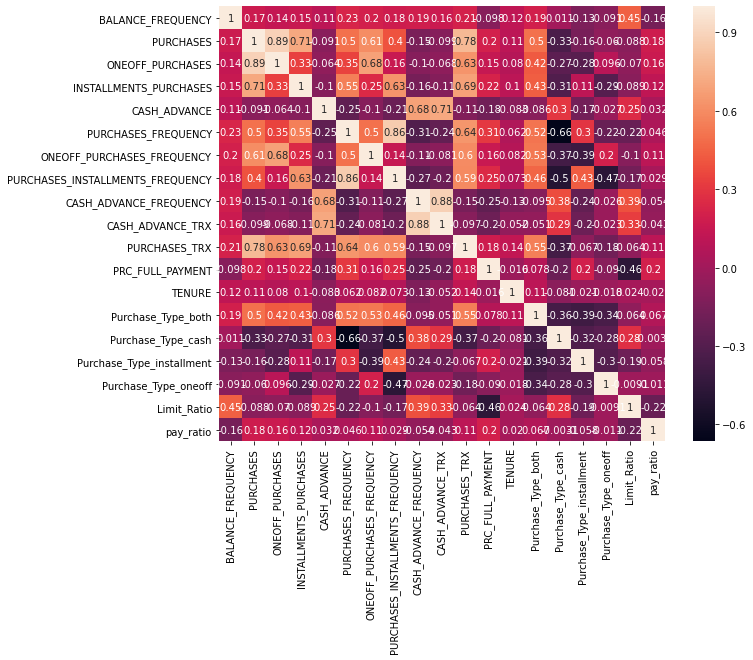

In [31]:
plt.figure(figsize = (10, 8))
sns.heatmap(cc_data_new.corr(),annot=True)
plt.show()

### Standardization of data : 

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
ss = StandardScaler()

cc_data_scaled=ss.fit_transform(cc_data_new)

In [117]:
pd.DataFrame(cc_data_scaled).shape

(8950, 19)

### PCA : 

In [131]:
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis

In [132]:
pca = PCA(n_components = 19)

In [133]:
pca.fit(cc_data_scaled)

PCA(copy=True, iterated_power='auto', n_components=19, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [134]:
pca.explained_variance_

array([5.59841437e+00, 3.07549795e+00, 2.11347520e+00, 1.51256166e+00,
       1.20926171e+00, 9.71104993e-01, 8.75535396e-01, 7.90380153e-01,
       7.40520704e-01, 5.06232677e-01, 3.85243846e-01, 3.52801223e-01,
       3.33060717e-01, 2.06999195e-01, 1.77977542e-01, 1.05957977e-01,
       3.44470946e-02, 1.26507352e-02, 2.96284332e-31])

In [135]:
sum(pca.explained_variance_)

19.002123142250515

In [136]:
var = pca.explained_variance_ratio_
var

array([2.94620466e-01, 1.61850227e-01, 1.11223108e-01, 7.95996136e-02,
       6.36382419e-02, 5.11050784e-02, 4.60756616e-02, 4.15943075e-02,
       3.89704192e-02, 2.66408482e-02, 2.02737264e-02, 1.85664107e-02,
       1.75275528e-02, 1.08934772e-02, 9.36619245e-03, 5.57611253e-03,
       1.81280241e-03, 6.65753776e-04, 1.55921699e-32])

In [137]:
var1 = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
var1

array([ 29.46,  45.65,  56.77,  64.73,  71.09,  76.2 ,  80.81,  84.97,
        88.87,  91.53,  93.56,  95.42,  97.17,  98.26,  99.2 ,  99.76,
        99.94, 100.01, 100.01])

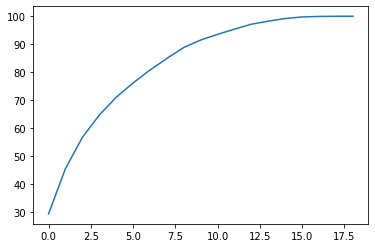

In [125]:
plt.plot(var1)

In [138]:
pc_final=PCA(n_components = 7).fit(cc_data_scaled)

reduced_cr=pc_final.fit_transform(cc_data_scaled)

In [139]:
pd.DataFrame(reduced_cr).head(5)

,0,1,2,3,4,5,6
0,-0.959874,-2.163570,-0.291632,-0.270024,-0.031773,0.520067,0.193966
1,-2.898111,1.355311,-0.498373,1.132475,0.825092,0.538781,-0.078626
2,0.761773,0.080501,2.564352,-1.514144,-1.470066,0.228148,-0.370176
3,-0.921629,-0.555195,2.474157,-0.303573,-0.668557,0.512820,0.503246
4,-1.539045,-0.549814,1.663425,-1.719220,-0.534686,0.597302,0.313611


In [140]:
col_list=num_vars.columns

In [141]:
col_list

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

### Deciding on factor loadings : 

In [159]:
Loadings =  pd.DataFrame((pc_final.components_.T * np.sqrt(pc_final.explained_variance_)).T,columns=cc_data_new.columns).T

In [160]:
(pc_final.components_.T * np.sqrt(pc_final.explained_variance_)).shape

(19, 7)

In [161]:
Loadings.to_csv("Loadings.csv")

In [162]:
Loadings

,0,1,2,3,4,5,6
BALANCE_FREQUENCY,0.159829,0.469864,-0.261021,-0.488164,-0.030237,0.072336,0.054602
PURCHASES,0.803525,0.364438,0.165556,0.111955,0.066944,0.050953,0.335186
ONEOFF_PURCHASES,0.644541,0.407966,0.412009,0.083997,0.015037,0.014920,0.265226
INSTALLMENTS_PURCHASES,0.721035,0.134089,-0.301755,0.105217,0.117706,0.072706,0.260996
CASH_ADVANCE,-0.365130,0.609927,-0.238803,0.360390,-0.223719,0.106403,-0.059281
PURCHASES_FREQUENCY,0.847760,-0.070157,-0.279864,-0.069532,-0.266211,-0.046583,-0.140080
ONEOFF_PURCHASES_FREQUENCY,0.635095,0.377699,0.461525,-0.049754,-0.132315,-0.081239,-0.152470
PURCHASES_INSTALLMENTS_FREQUENCY,0.739693,-0.142514,-0.576503,-0.015865,-0.073976,-0.025598,-0.072186
CASH_ADVANCE_FREQUENCY,-0.450450,0.705065,-0.263878,0.243203,-0.220700,0.015452,-0.062346
CASH_ADVANCE_TRX,-0.376283,0.696484,-0.280067,0.288036,-0.279875,0.103430,-0.125256


In [170]:
Loadings[0].sort_values(ascending = False)

PURCHASES_FREQUENCY                 0.847760
PURCHASES_TRX                       0.831502
PURCHASES                           0.803525
PURCHASES_INSTALLMENTS_FREQUENCY    0.739693
INSTALLMENTS_PURCHASES              0.721035
Purchase_Type_both                  0.658221
ONEOFF_PURCHASES                    0.644541
ONEOFF_PURCHASES_FREQUENCY          0.635095
PRC_FULL_PAYMENT                    0.375334
pay_ratio                           0.161624
BALANCE_FREQUENCY                   0.159829
TENURE                              0.157865
Purchase_Type_installment           0.081803
Purchase_Type_oneoff               -0.183553
Limit_Ratio                        -0.297254
CASH_ADVANCE                       -0.365130
CASH_ADVANCE_TRX                   -0.376283
CASH_ADVANCE_FREQUENCY             -0.450450
Purchase_Type_cash                 -0.632120
Name: 0, dtype: float64

##### From F1, we can choose among 'PURCHASES_FREQUENCY', 'PURCHASES_TRX', 'PURCHASES', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'INSTALLMENTS_PURCHASES', 'Purchase_Type_both', 'ONEOFF_PURCHASES' and 'ONEOFF_PURCHASES_FREQUENCY'. 

In [171]:
Loadings[1].sort_values(ascending = False)

CASH_ADVANCE_FREQUENCY              0.705065
CASH_ADVANCE_TRX                    0.696484
CASH_ADVANCE                        0.609927
Limit_Ratio                         0.524498
BALANCE_FREQUENCY                   0.469864
ONEOFF_PURCHASES                    0.407966
ONEOFF_PURCHASES_FREQUENCY          0.377699
PURCHASES                           0.364438
Purchase_Type_both                  0.339616
PURCHASES_TRX                       0.307115
Purchase_Type_cash                  0.251640
INSTALLMENTS_PURCHASES              0.134089
TENURE                              0.033441
Purchase_Type_oneoff                0.003364
pay_ratio                          -0.014733
PURCHASES_FREQUENCY                -0.070157
PURCHASES_INSTALLMENTS_FREQUENCY   -0.142514
PRC_FULL_PAYMENT                   -0.310851
Purchase_Type_installment          -0.607729
Name: 1, dtype: float64

##### From F2, we can choose from 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'CASH_ADVANCE' and 'Limit_Ratio'.

In [172]:
Loadings[2].sort_values(ascending = False)

Purchase_Type_oneoff                0.713475
ONEOFF_PURCHASES_FREQUENCY          0.461525
ONEOFF_PURCHASES                    0.412009
pay_ratio                           0.190696
PURCHASES                           0.165556
TENURE                              0.025702
PRC_FULL_PAYMENT                    0.024960
Purchase_Type_both                 -0.023245
PURCHASES_TRX                      -0.050685
Purchase_Type_cash                 -0.074225
Limit_Ratio                        -0.214823
CASH_ADVANCE                       -0.238803
BALANCE_FREQUENCY                  -0.261021
CASH_ADVANCE_FREQUENCY             -0.263878
PURCHASES_FREQUENCY                -0.279864
CASH_ADVANCE_TRX                   -0.280067
INSTALLMENTS_PURCHASES             -0.301755
Purchase_Type_installment          -0.571737
PURCHASES_INSTALLMENTS_FREQUENCY   -0.576503
Name: 2, dtype: float64

##### From F3, we can choose 'Purchase_Type_oneoff'.

In [173]:
Loadings[3].sort_values(ascending = False)

pay_ratio                           0.592144
PRC_FULL_PAYMENT                    0.476669
CASH_ADVANCE                        0.360390
CASH_ADVANCE_TRX                    0.288036
CASH_ADVANCE_FREQUENCY              0.243203
Purchase_Type_cash                  0.148155
PURCHASES                           0.111955
INSTALLMENTS_PURCHASES              0.105217
ONEOFF_PURCHASES                    0.083997
Purchase_Type_installment           0.052475
PURCHASES_TRX                       0.019923
PURCHASES_INSTALLMENTS_FREQUENCY   -0.015865
Purchase_Type_both                 -0.047019
ONEOFF_PURCHASES_FREQUENCY         -0.049754
PURCHASES_FREQUENCY                -0.069532
Purchase_Type_oneoff               -0.155394
TENURE                             -0.266855
BALANCE_FREQUENCY                  -0.488164
Limit_Ratio                        -0.513346
Name: 3, dtype: float64

##### From F4, we can choose 'pay_ratio'.

In [174]:
Loadings[4].sort_values(ascending = False)

Purchase_Type_cash                  0.585791
TENURE                              0.253257
Purchase_Type_both                  0.240681
pay_ratio                           0.218585
INSTALLMENTS_PURCHASES              0.117706
PURCHASES                           0.066944
Limit_Ratio                         0.052846
PURCHASES_TRX                       0.038957
ONEOFF_PURCHASES                    0.015037
BALANCE_FREQUENCY                  -0.030237
PRC_FULL_PAYMENT                   -0.058963
PURCHASES_INSTALLMENTS_FREQUENCY   -0.073976
ONEOFF_PURCHASES_FREQUENCY         -0.132315
CASH_ADVANCE_FREQUENCY             -0.220700
CASH_ADVANCE                       -0.223719
PURCHASES_FREQUENCY                -0.266211
CASH_ADVANCE_TRX                   -0.279875
Purchase_Type_installment          -0.304559
Purchase_Type_oneoff               -0.552547
Name: 4, dtype: float64

##### From F5, we can choose 'Purchase_Type_cash'.

In [175]:
Loadings[5].sort_values(ascending = False)

TENURE                              0.845345
pay_ratio                           0.279996
Purchase_Type_installment           0.185077
Purchase_Type_oneoff                0.164769
CASH_ADVANCE                        0.106403
CASH_ADVANCE_TRX                    0.103430
INSTALLMENTS_PURCHASES              0.072706
BALANCE_FREQUENCY                   0.072336
PRC_FULL_PAYMENT                    0.056414
PURCHASES                           0.050953
Limit_Ratio                         0.020717
PURCHASES_TRX                       0.019140
CASH_ADVANCE_FREQUENCY              0.015452
ONEOFF_PURCHASES                    0.014920
PURCHASES_INSTALLMENTS_FREQUENCY   -0.025598
PURCHASES_FREQUENCY                -0.046583
Purchase_Type_cash                 -0.077709
ONEOFF_PURCHASES_FREQUENCY         -0.081239
Purchase_Type_both                 -0.248313
Name: 5, dtype: float64

##### From F6, we can choose 'TENURE'.

In [176]:
Loadings[6].sort_values(ascending = False)

PURCHASES                           0.335186
Limit_Ratio                         0.271328
Purchase_Type_installment           0.265240
ONEOFF_PURCHASES                    0.265226
INSTALLMENTS_PURCHASES              0.260996
Purchase_Type_cash                  0.184975
PURCHASES_TRX                       0.144466
Purchase_Type_oneoff                0.095893
pay_ratio                           0.063731
BALANCE_FREQUENCY                   0.054602
CASH_ADVANCE                       -0.059281
CASH_ADVANCE_FREQUENCY             -0.062346
PRC_FULL_PAYMENT                   -0.071547
PURCHASES_INSTALLMENTS_FREQUENCY   -0.072186
CASH_ADVANCE_TRX                   -0.125256
PURCHASES_FREQUENCY                -0.140080
ONEOFF_PURCHASES_FREQUENCY         -0.152470
TENURE                             -0.285924
Purchase_Type_both                 -0.501382
Name: 6, dtype: float64

##### From F7, we can choose 'PURCHASES'.

###### Now that we have all the variables and their importances, we can choose among such variables to be the final variables in our model.

### Clustering : 

In [181]:
list_var = ['PURCHASES_FREQUENCY', 'PURCHASES_TRX', 'PURCHASES', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'Purchase_Type_oneoff', 'pay_ratio', 'Purchase_Type_cash', 'TENURE']

In [182]:
cc_data_scaled1=pd.DataFrame(cc_data_scaled, columns=cc_data_new.columns)
cc_data_scaled1.head(5)

cc_data_scaled2=cc_data_scaled1[list_var]
cc_data_scaled2.head(5)

,PURCHASES_FREQUENCY,PURCHASES_TRX,PURCHASES,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,Purchase_Type_oneoff,pay_ratio,Purchase_Type_cash,TENURE
0,-0.806490,-0.579714,-0.551327,-0.707313,-0.685371,-0.557505,-0.514625,-0.268383,-0.543690,0.36068
1,-1.221758,-0.675130,-0.613881,-0.916995,0.593147,0.166685,-0.514625,-0.111512,1.839282,0.36068
2,1.269843,-0.102638,-0.106917,-0.916995,-0.685371,-0.557505,1.943162,-0.298365,-0.543690,0.36068
3,-1.014125,-0.627422,0.369006,-0.916995,-0.259200,-0.376457,1.943162,-0.363736,-0.543690,0.36068
4,-1.014125,-0.627422,-0.603389,-0.916995,-0.685371,-0.557505,1.943162,-0.181068,-0.543690,0.36068


In [183]:
from sklearn.cluster import KMeans

In [184]:
km_3 = KMeans(n_clusters=3,random_state=123)

In [185]:
km_3.fit(cc_data_scaled2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [186]:
km_3.labels_

array([1, 0, 1, ..., 2, 0, 1], dtype=int32)

In [187]:
pd.Series(km_3.labels_).value_counts()

2    3911
1    2727
0    2312
dtype: int64

In [188]:
km_4=KMeans(n_clusters=4,random_state=123).fit(cc_data_scaled2)
#km_5.labels_a

km_5=KMeans(n_clusters=5,random_state=123).fit(cc_data_scaled2)
#km_5.labels_

km_6=KMeans(n_clusters=6,random_state=123).fit(cc_data_scaled2)
#km_6.labels_

km_7=KMeans(n_clusters=7,random_state=123).fit(cc_data_scaled2)
#km_7.labels_

km_8=KMeans(n_clusters=8,random_state=123).fit(cc_data_scaled2)
#km_5.labels_

In [189]:
from sklearn import metrics
metrics.silhouette_score(cc_data_scaled2, km_3.labels_)

0.31108542233004505

In [190]:
# calculate SC for K=3 through K=12
k_range = range(3, 9)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(cc_data_scaled2)
    scores.append(metrics.silhouette_score(cc_data_scaled2, km.labels_))

In [191]:
scores

[0.3111923545080617,
 0.37990370547602337,
 0.40106704387305675,
 0.40123948678484894,
 0.4190539870328384,
 0.3671358548763988]

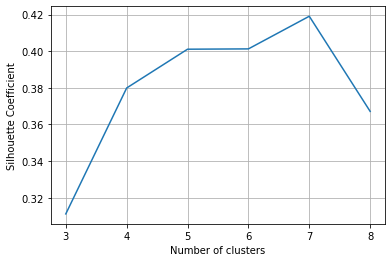

In [194]:
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

##### As we can see, the 7 cluster solution might able to best explain our segmented data as it has the highest value.

In [192]:
cc_data_new['cluster_3'] = km_3.labels_
cc_data_new['cluster_4'] = km_4.labels_
cc_data_new['cluster_5'] = km_5.labels_
cc_data_new['cluster_6'] = km_6.labels_
cc_data_new['cluster_7'] = km_7.labels_
cc_data_new['cluster_8'] = km_8.labels_

In [193]:
cc_data_new

,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,...,Purchase_Type_installment,Purchase_Type_oneoff,Limit_Ratio,pay_ratio,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8
0,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,...,1,0,4.090075,144.650844,1,1,3,1,5,1
1,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,...,0,0,45.749535,382.624146,0,3,1,0,1,7
2,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,...,0,1,33.268651,99.168154,1,2,0,3,3,4
3,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,...,0,1,22.222274,0.000000,1,2,0,3,3,4
4,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,...,0,1,68.142861,277.107453,1,2,0,3,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,...,1,0,2.849352,666.023056,2,1,3,1,2,5
8946,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,...,1,0,1.918322,35.952030,2,1,3,1,2,5
8947,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,...,1,0,2.339867,98.607599,2,1,3,1,2,5
8948,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,...,0,0,2.691513,94.250501,0,3,1,0,2,5


In [195]:
size=pd.concat([pd.Series(cc_data_new.cluster_3.size), pd.Series.sort_index(cc_data_new.cluster_3.value_counts()), pd.Series.sort_index(cc_data_new.cluster_4.value_counts()),
           pd.Series.sort_index(cc_data_new.cluster_5.value_counts()), pd.Series.sort_index(cc_data_new.cluster_6.value_counts()),
           pd.Series.sort_index(cc_data_new.cluster_7.value_counts()), pd.Series.sort_index(cc_data_new.cluster_8.value_counts())])

In [196]:
size

0    8950
0    2312
1    2727
2    3911
0     820
1    4059
2    1818
3    2253
0    1693
1    1828
2     764
3    3964
4     701
0    1828
1    3972
2     754
3    1692
4       3
5     701
0     745
1    1657
2     593
3    1578
4     650
5    3722
6       5
0     634
1    1665
2    2291
3     543
4    1579
5     593
6       3
7    1642
dtype: int64

In [197]:
Seg_size=pd.DataFrame(size, columns=['Seg_size'])
Seg_Pct = pd.DataFrame(size/cc_data_new.cluster_3.size, columns=['Seg_Pct'])

In [198]:
Profling_output = pd.concat([cc_data_new.apply(lambda x: x.mean()).T, cc_data_new.groupby('cluster_3').apply(lambda x: x.mean()).T, cc_data_new.groupby('cluster_4').apply(lambda x: x.mean()).T,
        cc_data_new.groupby('cluster_5').apply(lambda x: x.mean()).T, cc_data_new.groupby('cluster_6').apply(lambda x: x.mean()).T,
          cc_data_new.groupby('cluster_7').apply(lambda x: x.mean()).T, cc_data_new.groupby('cluster_8').apply(lambda x: x.mean()).T], axis=1)

In [199]:
Profling_output_final=pd.concat([Seg_size.T, Seg_Pct.T, Profling_output], axis=0)

In [200]:
Profling_output_final.columns = ['Overall', 'KM3_1', 'KM3_2', 'KM3_3',
                                'KM4_1', 'KM4_2', 'KM4_3', 'KM4_4',
                                'KM5_1', 'KM5_2', 'KM5_3', 'KM5_4', 'KM5_5',
                                'KM6_1', 'KM6_2', 'KM6_3', 'KM6_4', 'KM6_5','KM6_6',
                                'KM7_1', 'KM7_2', 'KM7_3', 'KM7_4', 'KM7_5','KM7_6','KM7_7',
                                'KM8_1', 'KM8_2', 'KM8_3', 'KM8_4', 'KM8_5','KM8_6','KM8_7','KM8_8',]

In [201]:
Profling_output_final

,Overall,KM3_1,KM3_2,KM3_3,KM4_1,KM4_2,KM4_3,KM4_4,KM5_1,KM5_2,...,KM7_6,KM7_7,KM8_1,KM8_2,KM8_3,KM8_4,KM8_5,KM8_6,KM8_7,KM8_8
Seg_size,8950.000000,2312.000000,2727.000000,3911.000000,820.000000,4059.000000,1818.000000,2253.000000,1693.000000,1828.000000,...,3722.000000,5.000000,634.000000,1665.000000,2291.000000,543.000000,1579.000000,593.000000,3.000000,1642.000000
Seg_Pct,1.000000,0.258324,0.304693,0.436983,0.091620,0.453520,0.203128,0.251732,0.189162,0.204246,...,0.415866,0.000559,0.070838,0.186034,0.255978,0.060670,0.176425,0.066257,0.000335,0.183464
BALANCE_FREQUENCY,0.878083,0.892427,0.789977,0.931037,0.979610,0.871056,0.832320,0.890719,0.822555,0.873032,...,0.871155,0.400000,0.975015,0.785334,0.943771,0.986335,0.829383,0.784102,0.575758,0.888581
PURCHASES,936.229237,62.935355,588.873359,1694.678466,4562.753000,818.117736,665.222635,47.793862,682.794141,0.665618,...,842.072039,210.304000,608.404259,540.141886,1226.091846,5454.923941,677.405763,427.594115,0.000000,0.000000
ONEOFF_PURCHASES,536.493774,39.474597,519.501240,842.156515,2714.579502,322.480281,663.693023,26.685624,679.779997,0.000000,...,333.056744,146.440000,379.465786,268.832763,471.126674,3345.766271,675.543746,254.039713,0.000000,0.000000
INSTALLMENTS_PURCHASES,384.498368,22.471401,63.336711,822.446255,1683.742150,495.927081,0.000000,21.137954,0.000000,0.702243,...,509.250543,63.864000,225.384165,271.947856,754.549421,1866.819836,0.000000,174.060304,0.000000,0.000000
CASH_ADVANCE,935.920972,2158.351541,554.888177,478.957781,820.768618,378.882536,781.369337,2106.102426,554.054284,1641.785222,...,289.606638,4146.069282,4131.007361,309.147195,322.703457,556.365030,550.329002,1171.561363,6506.992181,1594.432257
PURCHASES_FREQUENCY,0.490351,0.046169,0.316331,0.874268,0.955879,0.725764,0.314613,0.038604,0.317589,0.001213,...,0.718783,0.200000,0.349125,0.442702,0.936240,0.959754,0.318857,0.438977,0.000000,0.000203
ONEOFF_PURCHASES_FREQUENCY,0.202458,0.021707,0.234196,0.287179,0.648382,0.165699,0.314384,0.016068,0.317392,0.000000,...,0.168538,0.016667,0.178787,0.123388,0.230931,0.711469,0.318646,0.125920,0.000000,0.000000
PURCHASES_INSTALLMENTS_FREQUENCY,0.364437,0.026743,0.078218,0.763637,0.825942,0.623162,0.000000,0.024424,0.000000,0.000979,...,0.620703,0.200000,0.227409,0.325336,0.854015,0.814329,0.000000,0.298128,0.000000,0.000203


In [202]:
Profling_output_final.to_csv('Profiling_output.csv')